In [1]:
import numpy as np 
import matplotlib as plt
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

# CODE SHARED WITH ALESSANDRO NERI

In [22]:
def SAR(α, m , S):

    SAR = S * (1 - (np.log(m* (1-α) + α)/np.log(m)))

    return  SAR

def EAR(α, m, S):

    EAR = -S/np.abs(np.log(m)) * np.log(1-α*(1-m))

    return EAR
dα = 0.001
alphas = np.arange(0, 1 + dα ,dα)

In [23]:
def power_law(α, z, k ):
    
    S_a = k * α ** z 

    return S_a 

In [24]:
m = 0.001
S = 100

In [25]:
ss = SAR(alphas,m, S)
ee = EAR(alphas,m, S)

In [66]:
opt, _ = curve_fit(power_law, alphas, ss, p0= (0.25, 100))


parameters_text = (
    f"Fitted parameters:\n"
    f"z = {round(opt[0],2)}\n"
    f"k = {round(opt[1],2)}\n"
)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)


Species lost evaluated with SAR model, losing 1/3 of the surface : 5
Species lost evaluated with EAR model, losing 1/3 of the surface : 5


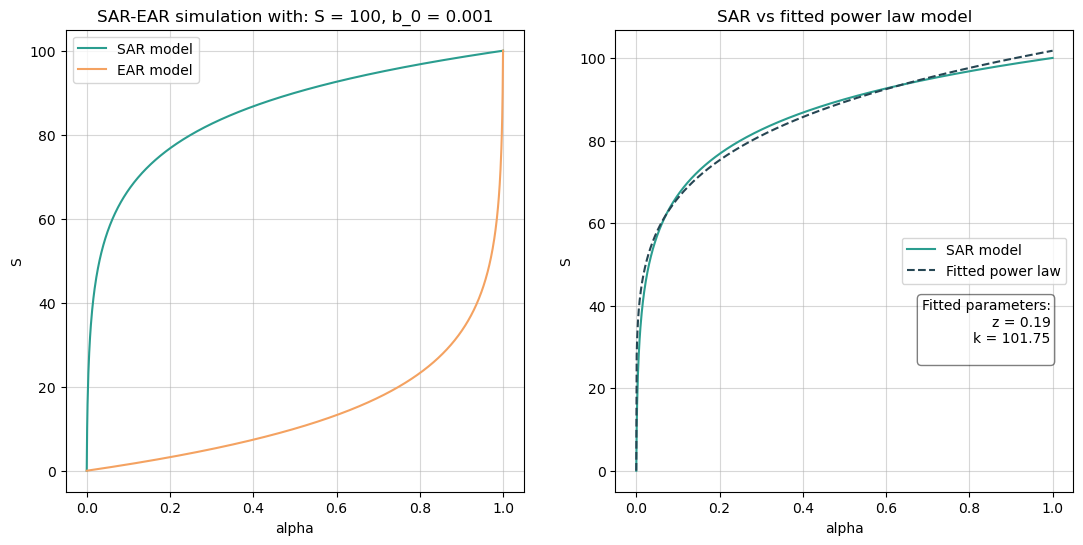

In [69]:

fig, axes = plt.subplots(1, 2, figsize = (13,6))

axes[0].set_title(f'SAR-EAR simulation with: S = 100, b_0 = 0.001')
axes[0].plot(alphas, ss, label='SAR model', color = '#2a9d8f')
axes[0].plot(alphas,ee , label='EAR model', color = '#f4a261')
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('S')
axes[0].grid(alpha=0.5)
axes[0].legend()

axes[1].set_title('SAR vs fitted power law model')
axes[1].plot(alphas, ss, label='SAR model', color = '#2a9d8f')
axes[1].plot(alphas,power_law(alphas, opt[0], opt[1] ) , label='Fitted power law', color = '#264653', linestyle = '--')
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('S')
axes[1].grid(alpha=0.5)
axes[1].legend(loc = 'center right')
axes[1].text(0.95, 0.35, parameters_text, transform= axes[1].transAxes, fontsize=10,
            verticalalignment='center', horizontalalignment='right', bbox=props)

print('Species lost evaluated with SAR model, losing 1/3 of the surface :', int(100 - SAR(1-1/3,m, S)))
print('Species lost evaluated with EAR model, losing 1/3 of the surface :', int(EAR(1/3,m, S)))
